In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN


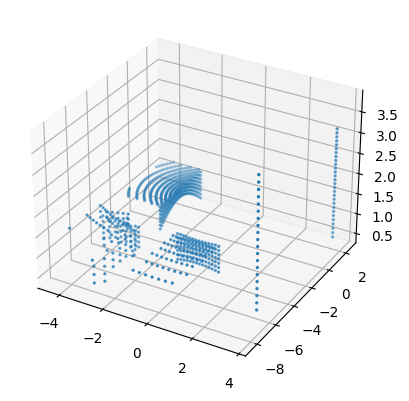

In [74]:
file = '_out/lidar/01516050.ply'

# Load data
data = np.loadtxt(file, skiprows=7)

# Transform Z axis (LIDAR is 2.5m above ground)
data[:,2] = 2.5 - data[:,2]

# Decimate data
data = data[::1]

# Filter data (ground removal)
data = data[data[:,2] > 0.5]

# Plot data
ax = plt.axes(projection='3d')
ax.scatter(-data[:,0], data[:,1], data[:,2], s=2)
plt.show()


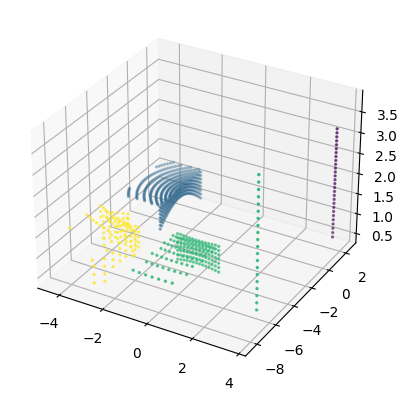

In [91]:
km = KMeans(n_clusters=4)
km.fit(data)

# Plot data
ax = plt.axes(projection='3d')
ax.scatter(-data[:,0], data[:,1], data[:,2], c=km.labels_, s=2)
plt.show()


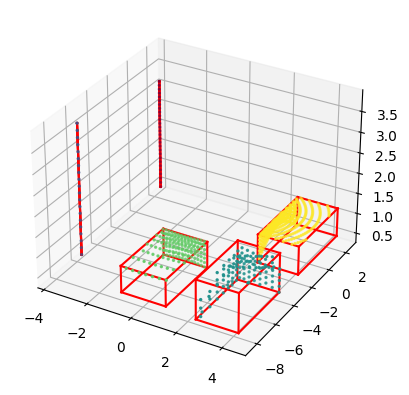

In [160]:
from scipy.ndimage.measurements import find_objects

db = DBSCAN(eps=1.5, min_samples=10)
db.fit(data)

labeled_data = np.hstack((data, db.labels_.reshape(-1,1)))
labeled_data = labeled_data[labeled_data[:, -1].argsort()]
labeled_data = np.split(labeled_data[:,:-1], np.unique(labeled_data[:, -1], return_index=True)[1][1:])

ax = plt.axes(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=db.labels_, s=2)

# Compute bounding box for each cluster
for cluster in labeled_data:
    x_min = np.min(cluster[:,0])
    x_max = np.max(cluster[:,0])
    y_min = np.min(cluster[:,1])
    y_max = np.max(cluster[:,1])
    z_min = np.min(cluster[:,2])
    z_max = np.max(cluster[:,2])

    # Plot bounding box
    ax.plot([x_min, x_min], [y_min, y_min], [z_min, z_max], c='r')
    ax.plot([x_min, x_min], [y_max, y_max], [z_min, z_max], c='r')
    ax.plot([x_max, x_max], [y_min, y_min], [z_min, z_max], c='r')
    ax.plot([x_max, x_max], [y_max, y_max], [z_min, z_max], c='r')

    ax.plot([x_min, x_max], [y_min, y_min], [z_min, z_min], c='r')
    ax.plot([x_min, x_max], [y_min, y_min], [z_max, z_max], c='r')
    ax.plot([x_min, x_max], [y_max, y_max], [z_min, z_min], c='r')
    ax.plot([x_min, x_max], [y_max, y_max], [z_max, z_max], c='r')

    ax.plot([x_min, x_min], [y_min, y_max], [z_min, z_min], c='r')
    ax.plot([x_min, x_min], [y_min, y_max], [z_max, z_max], c='r')
    ax.plot([x_max, x_max], [y_min, y_max], [z_min, z_min], c='r')
    ax.plot([x_max, x_max], [y_min, y_max], [z_max, z_max], c='r')

# Plot data
plt.show()
